Naše dáta obsahujú viac ako 100 MB záznamov, mnohé kategorické premenné a pod. a preto si potrebujeme najprv upraviť dataset, predpripraviť ho na použitie a následne importovat do našej navrdhnutej siete.

Ako výsledok dosiahneme očistené transformované dáta od outlierov, nepresných hodnôt a použijeme subset dát na základe kritérií, ktorý si následne vzesportujeme do csv pre daľšie použitie.

Aby sme mohli pracovat s datami, spravit korelaciu a podobne potrebujeme prerobit cely dataset na numericke hodnoty

Nase data budu obsahovat, ze 


END result will get 2 files: one csv, and other npy encoded

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as ss
import itertools 
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
file = pd.read_csv("database.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
file.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [4]:
# skontrolujeme aký tvar má databáza, s ktorou budeme pracovať
file.shape

(638454, 24)

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [6]:
file['Perpetrator Age']=pd.to_numeric(file['Perpetrator Age'], errors='coerce')

In [7]:
file.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          1
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [8]:
file.dropna()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57.0,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22.0,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31.0,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [9]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Record ID              638454 non-null  int64  
 1   Agency Code            638454 non-null  object 
 2   Agency Name            638454 non-null  object 
 3   Agency Type            638454 non-null  object 
 4   City                   638454 non-null  object 
 5   State                  638454 non-null  object 
 6   Year                   638454 non-null  int64  
 7   Month                  638454 non-null  object 
 8   Incident               638454 non-null  int64  
 9   Crime Type             638454 non-null  object 
 10  Crime Solved           638454 non-null  object 
 11  Victim Sex             638454 non-null  object 
 12  Victim Age             638454 non-null  int64  
 13  Victim Race            638454 non-null  object 
 14  Victim Ethnicity       638454 non-nu

In [10]:
#file1 = file.iloc[:,:].values

In [11]:
#file1

In [12]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# file1[:,11]=victim_sex.fit_transform(file1[:,11])

In [15]:
# file1[:,11]

In [16]:
# file['Victim Sex']

In [17]:
# victim_sex

In [18]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse=False)

In [19]:
# ohe.fit_transform(file[['Victim Sex']])

In [20]:
# ohe.categories_

In [21]:
file_to_see_outliers = file.drop(labels=['Record ID', 'Year', 'Incident'], axis=1)

<AxesSubplot:>

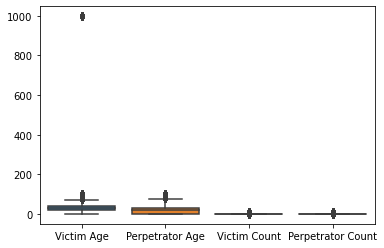

In [22]:
sns.boxplot(data = file_to_see_outliers)


In [23]:
file['Victim Age'].unique()

array([ 14,  43,  30,  42,  99,  32,  38,  36,  20,  48,  31,  16,  33,
        27,  21,  60,  40,  18,   8,  25,  24,  46,  23,  22,  45,  26,
        58,  17,  29,  41,  68,  13,  35,  44,  54,  37,  51,  90,  50,
        52,  61,  63,  19,  28,  70,  72,  74,  53,  57,  76,  79,  69,
        34,  66,  55,  67,  65,  47,   1,  49,  62,  75,  56,  59,  78,
        39,  15,   0,  71,  77,   2,   4,  64,  82,  85,   6,   5,   7,
         9,  84,  10,  86,  11,  73,  83, 998,  81,  87,  80,   3,  12,
        94,  93,  92,  89,  97,  88,  91,  95,  98,  96], dtype=int64)

In [24]:
file[file['Victim Age'] == 998].shape[0]

974

In [25]:
temp_to_delete = []
for x,y in zip(file['Record ID'],file['Victim Age']):
    if y==998:
        temp_to_delete.append(x-1)
    

In [26]:
temp_to_delete

[1052,
 4228,
 5456,
 5488,
 5489,
 5490,
 5582,
 5617,
 8765,
 9404,
 14031,
 16153,
 23035,
 23036,
 27842,
 27971,
 27980,
 27987,
 28013,
 28017,
 28047,
 28066,
 28149,
 29060,
 29365,
 29399,
 32241,
 35622,
 35634,
 35830,
 36383,
 41022,
 41289,
 45801,
 49108,
 49137,
 49266,
 50430,
 50596,
 50692,
 52297,
 52779,
 56563,
 56863,
 62641,
 62647,
 69313,
 69318,
 69329,
 69331,
 69342,
 69376,
 69385,
 69402,
 69431,
 69433,
 69449,
 69476,
 69484,
 72923,
 77793,
 78324,
 81254,
 83079,
 85211,
 88588,
 88800,
 88811,
 88897,
 88898,
 88962,
 88977,
 89017,
 89018,
 89025,
 89026,
 89029,
 89038,
 89051,
 89095,
 89102,
 89111,
 89379,
 89407,
 91856,
 94500,
 95184,
 95853,
 95904,
 96152,
 96469,
 96552,
 96875,
 97245,
 100708,
 100965,
 101549,
 102172,
 102183,
 103228,
 107165,
 107253,
 107293,
 107357,
 107404,
 108502,
 108560,
 113105,
 114525,
 115144,
 115146,
 115154,
 117516,
 118192,
 118242,
 119821,
 119935,
 120058,
 121586,
 121674,
 121787,
 121809,
 12546

In [27]:
file = file.drop(labels=temp_to_delete, axis=0)

In [28]:
file[file['Victim Age'] == 998].shape[0]

0

<AxesSubplot:xlabel='Victim Age', ylabel='count'>

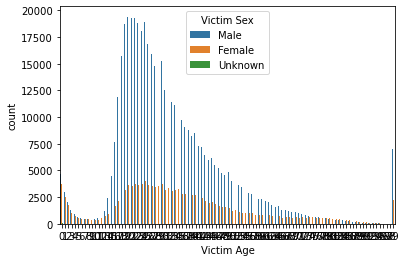

In [29]:
sns.countplot(x='Victim Age', hue='Victim Sex',data = file)

In [30]:
file[file['Victim Age'] == 99].shape[0]

9281

In [31]:
temp_to_delete.clear()
for x,y in zip(file['Record ID'],file['Victim Age']):
    if y==99:
        temp_to_delete.append(x-1)
    

In [32]:
file = file.drop(labels=temp_to_delete, axis=0)

<AxesSubplot:xlabel='Victim Age', ylabel='count'>

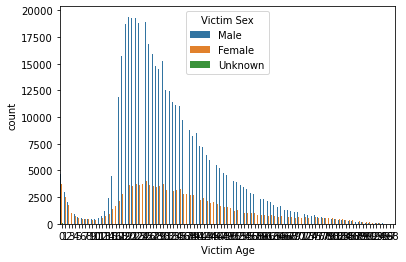

In [33]:
sns.countplot(x='Victim Age', hue='Victim Sex',data = file)

<AxesSubplot:xlabel='Perpetrator Age', ylabel='count'>

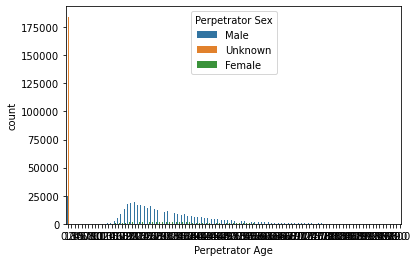

In [34]:
sns.countplot(x='Perpetrator Age', hue='Perpetrator Sex',data = file)

In [35]:
file[(file['Perpetrator Age'] == 0)].shape[0]

210059

In [36]:
file[(file['Perpetrator Sex'] == 'Unknown')].shape[0]

184931

In [37]:
file[(file['Crime Solved'] == 'No')].shape[0]

184847

In [38]:
len(file)

628199

In [39]:
628199 - 210059

418140

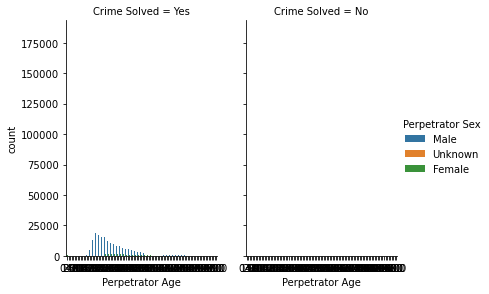

In [40]:
g = sns.catplot(x="Perpetrator Age", hue="Perpetrator Sex", col="Crime Solved",
                data=file, kind="count",
                height=4, aspect=.7);

<AxesSubplot:xlabel='Year', ylabel='count'>

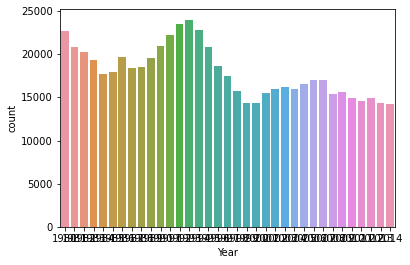

In [41]:
sns.countplot(x = 'Year', data = file)

In [42]:
temp_to_delete.clear()
for x,y in zip(file['Record ID'],file['Perpetrator Sex']):
    if y== 'Unknown':
        temp_to_delete.append(x-1)
    

In [43]:
file_without_age_outlier = file.drop(labels=temp_to_delete)

In [44]:
file_without_age_outlier

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,...,Unknown,Male,36.0,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Unknown,Male,27.0,Black,Unknown,Wife,Knife,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638448,638449,WY01301,Casper,Municipal Police,Natrona,Wyoming,2014,August,1,Murder or Manslaughter,...,Unknown,Male,67.0,Black,Unknown,Friend,Firearm,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57.0,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22.0,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31.0,White,Not Hispanic,Stranger,Knife,0,1,FBI


<AxesSubplot:xlabel='Perpetrator Age', ylabel='count'>

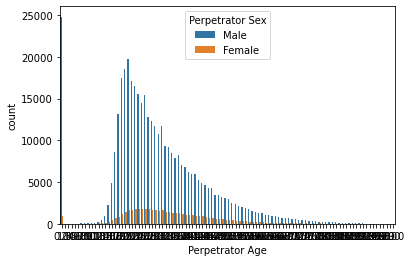

In [46]:
sns.countplot(x='Perpetrator Age', hue='Perpetrator Sex',data = file_without_age_outlier)

In [47]:
# corelation between city and if the crime is solved
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

0   0
1   1
0   0
2   2
0   0
3   3
0   0
4   4
0   0
5   5
0   0
6   6
0   0
7   7
0   0
8   8
0   0
9   9
0   0
10   10
0   0
11   11
0   0
12   12
0   0
13   13
1   1
2   2
1   1
3   3
1   1
4   4
1   1
5   5
1   1
6   6
1   1
7   7
1   1
8   8
1   1
9   9
1   1
10   10
1   1
11   11
1   1
12   12
1   1
13   13
2   2
3   3
2   2
4   4
2   2
5   5
2   2
6   6
2   2
7   7
2   2
8   8
2   2
9   9
2   2
10   10
2   2
11   11
2   2
12   12
2   2
13   13
3   3
4   4
3   3
5   5
3   3
6   6
3   3
7   7
3   3
8   8
3   3
9   9
3   3
10   10
3   3
11   11
3   3
12   12
3   3
13   13
4   4
5   5
4   4
6   6
4   4
7   7
4   4
8   8
4   4
9   9
4   4
10   10
4   4
11   11
4   4
12   12
4   4
13   13
5   5
6   6
5   5
7   7
5   5
8   8
5   5
9   9
5   5
10   10
5   5
11   11
5   5
12   12
5   5
13   13
6   6
7   7
6   6
8   8
6   6
9   9
6   6
10   10
6   6
11   11
6   6
12   12
6   6
13   13
7   7
8   8
7   7
9   9
7   7
10   10
7   7
11   11
7   7
12   12
7   7
13   13
8   8
9   9
8   8
10   1

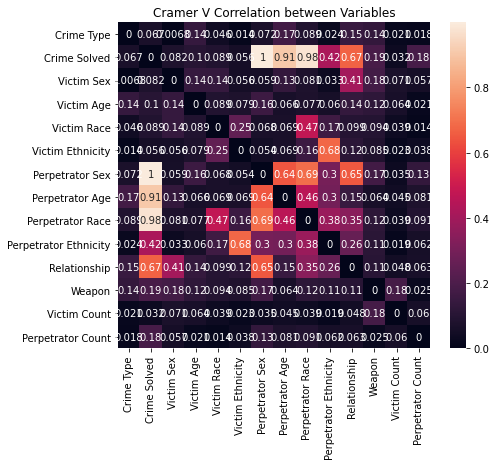

In [48]:
# dropping some columns from the heatmaps because they seems to be irrelevant after couple trials:
# dropping: 'Record ID', 'Agency Code', 'Year', 'Incident', 'Record Source'
# dropping additional columns:'Agency Name', 'Agency Type', 'City','State', 'Month'
cols = ['Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count',]
corrM = np.zeros((len(cols),len(cols)))

# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    print(idx1, " ", cols.index(col1))
    print(idx2, " ", cols.index(col2))
    corrM[idx1, idx2] = cramers_v(file[col1], file[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]
corr = pd.DataFrame(corrM, index=cols, columns=cols)

fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

In [50]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628199 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Record ID              628199 non-null  int64  
 1   Agency Code            628199 non-null  object 
 2   Agency Name            628199 non-null  object 
 3   Agency Type            628199 non-null  object 
 4   City                   628199 non-null  object 
 5   State                  628199 non-null  object 
 6   Year                   628199 non-null  int64  
 7   Month                  628199 non-null  object 
 8   Incident               628199 non-null  int64  
 9   Crime Type             628199 non-null  object 
 10  Crime Solved           628199 non-null  object 
 11  Victim Sex             628199 non-null  object 
 12  Victim Age             628199 non-null  int64  
 13  Victim Race            628199 non-null  object 
 14  Victim Ethnicity       628199 non-nu

In [51]:
temp_to_delete.clear()
for x,y in zip(file['Record ID'],file['Year']):
    if y < 1990:
        temp_to_delete.append(x-1)
    

In [52]:
len(temp_to_delete)

194934

In [53]:
file_test=file.drop(labels=temp_to_delete)

In [54]:
file_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433265 entries, 198531 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Record ID              433265 non-null  int64  
 1   Agency Code            433265 non-null  object 
 2   Agency Name            433265 non-null  object 
 3   Agency Type            433265 non-null  object 
 4   City                   433265 non-null  object 
 5   State                  433265 non-null  object 
 6   Year                   433265 non-null  int64  
 7   Month                  433265 non-null  object 
 8   Incident               433265 non-null  int64  
 9   Crime Type             433265 non-null  object 
 10  Crime Solved           433265 non-null  object 
 11  Victim Sex             433265 non-null  object 
 12  Victim Age             433265 non-null  int64  
 13  Victim Race            433265 non-null  object 
 14  Victim Ethnicity       433265 n

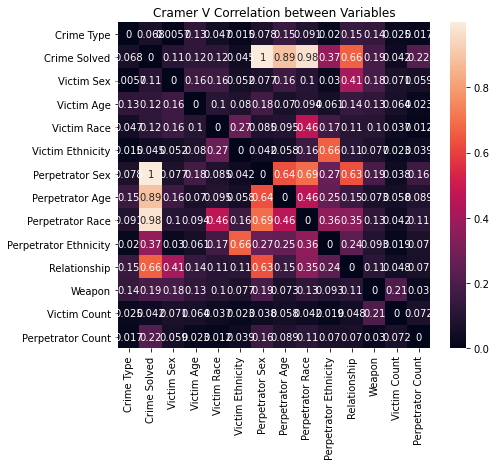

In [55]:
# dropping some columns from the heatmaps because they seems to be irrelevant after couple trials:
# dropping: 'Record ID', 'Agency Code', 'Year', 'Incident', 'Record Source'
# dropping additional columns:'Agency Name', 'Agency Type', 'City','State', 'Month'
cols = ['Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count',]
corrM = np.zeros((len(cols),len(cols)))

# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(file_test[col1], file_test[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]
corr = pd.DataFrame(corrM, index=cols, columns=cols)

fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

In [56]:
file_test = file_test.reset_index()

In [57]:
file_test = file_test.drop(labels='index', axis=1)

In [58]:
file_test

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,198532,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,February,1,Murder or Manslaughter,...,Unknown,Male,49.0,White,Unknown,Girlfriend,Handgun,0,0,FBI
1,198533,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,April,1,Murder or Manslaughter,...,Unknown,Male,18.0,White,Unknown,Stranger,Handgun,0,1,FBI
2,198534,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,April,2,Murder or Manslaughter,...,Unknown,Male,28.0,Native American/Alaska Native,Unknown,Girlfriend,Blunt Object,0,0,FBI
3,198535,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,June,1,Murder or Manslaughter,...,Unknown,Male,21.0,Native American/Alaska Native,Unknown,Stranger,Blunt Object,0,0,FBI
4,198536,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1990,August,1,Murder or Manslaughter,...,Unknown,Male,21.0,White,Unknown,Acquaintance,Handgun,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433260,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
433261,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57.0,White,Unknown,Acquaintance,Handgun,0,0,FBI
433262,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22.0,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
433263,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31.0,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [59]:
file_test.to_csv("dataset-1990-2014.csv")

In [60]:
pd. __version__

'1.2.4'